How to make Wide and Deep structure?
- using matrix

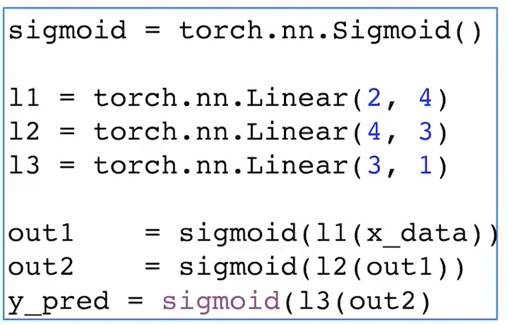

- 이전 단계의 출력이 다음 단계의 입력으로 사용된다.

In [1]:
import torch 
from torch.autograd import Variable
import numpy as np 

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32) 
x_data = torch.from_numpy(xy[:, 0:-1]) 
y_data = torch.from_numpy(xy[:, [-1]])

In [2]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Deep, Wide
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 2)
        self.l4 = torch.nn.Linear(2, 1) 
        
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        y_pred = self.sigmoid(self.l4(out3))
        return y_pred

In [3]:
model = Model()

criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

C:\Users\82104\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [4]:
for epoch in range(1000):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    
    if(epoch % 100 == 0):
        print("loss : ",loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

loss :  tensor(0.6455, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6454, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6454, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6454, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
loss :  tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
